In [159]:
# using GuSTO
include("../src/GuSTO.jl")

Forest

In [160]:
robot = Car()
model = DubinsCar()
env = BlankEnv()

N = 41
x_init = 2*ones(3)
x_goal = zeros(3)
tf_guess = 5.

PD = ProblemDefinition(robot, model, env, x_init, x_goal)
TOP = TrajectoryOptimizationProblem(PD, N, tf_guess, fixed_final_time=true)
TOS_SCP = TrajectoryOptimizationSolution(TOP)

TrajectoryOptimizationSolution(Trajectory([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0], 5.0, 0.125), #undef, #undef, #undef)

In [161]:
# SCP Only
TOS_SCP = TrajectoryOptimizationSolution(TOP)
# solve_SCP!(TOS_SCP, TOP, solve_gusto_cvx!, init_traj_straightline, "Gurobi", OutputFlag=0)
solve_SCP!(TOS_SCP, TOP, solve_gusto_jump!, init_traj_straightline, "Ipopt", print_level=0)

@show TOS_SCP.SCPS.converged
@show TOS_SCP.SCPS.iterations
@show TOS_SCP.SCPS.total_time
@show TOS_SCP.SCPS.J_true[end]

(TOS_SCP.SCPS).converged = true
(TOS_SCP.SCPS).iterations = 17
(TOS_SCP.SCPS).total_time = 0.8391679030000001
(TOS_SCP.SCPS).J_true[end] = 14.797192532827019


14.797192532827019

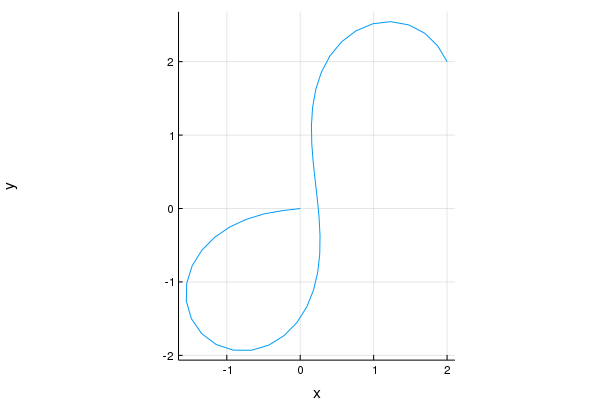

In [162]:
using Plots
gr(fmt=:png)
plot([TOS_SCP.SCPS.traj.X[1,:]], [TOS_SCP.SCPS.traj.X[2,:]],
    xlabel = "x",
    ylabel = "y",
    aspect_ratio = 1,
    legend = :none)

In [163]:
TOS_SCPS  = TrajectoryOptimizationSolution(TOP)
solve_SCPshooting!(TOS_SCPS, TOP, solve_gusto_jump!, init_traj_straightline, "Ipopt", print_level=0)

@show TOS_SCPS.SS.converged
@show TOS_SCPS.SS.prob_status
@show TOS_SCPS.SCPS.iterations
@show TOS_SCPS.total_time
@show TOS_SCPS.SS.J_true[end]

┌ Warning: `binary_minheap(xs::AbstractVector{T}) where T` is deprecated, use `BinaryMinHeap(xs)` instead.
│   caller = tstop_saveat_disc_handling at solve.jl:371 [inlined]
└ @ Core /home/bylard/.julia/packages/OrdinaryDiffEq/NS3ps/src/solve.jl:371
┌ Warning: `binary_minheap(xs::AbstractVector{T}) where T` is deprecated, use `BinaryMinHeap(xs)` instead.
│   caller = #__init#203(::Int64, ::Array{Float64,1}, ::Array{Float64,1}, ::Array{Float64,1}, ::Nothing, ::Bool, ::Nothing, ::Bool, ::Bool, ::Nothing, ::Bool, ::Bool, ::Float64, ::Bool, ::Rational{Int64}, ::Nothing, ::Nothing, ::Int64, ::Rational{Int64}, ::Int64, ::Int64, ::Rational{Int64}, ::Bool, ::Int64, ::Nothing, ::Nothing, ::Int64, ::Float64, ::Float64, ::typeof(DiffEqBase.ODE_DEFAULT_NORM), ::typeof(opnorm), ::typeof(DiffEqBase.ODE_DEFAULT_ISOUTOFDOMAIN), ::typeof(DiffEqBase.ODE_DEFAULT_UNSTABLE_CHECK), ::Bool, ::Bool, ::Bool, ::Bool, ::Bool, ::Bool, ::Bool, ::Bool, ::Int64, ::String, ::typeof(DiffEqBase.ODE_DEFAULT_PROG_MESSAGE)

(TOS_SCPS.SS).converged = true
(TOS_SCPS.SS).prob_status = Symbol[:NA, :Diverged, :Diverged, :Diverged, :Optimal, :Diverged, :Optimal, :Optimal, :Diverged, :Diverged, :Optimal, :Optimal]
(TOS_SCPS.SCPS).iterations = 11
TOS_SCPS.total_time = 3.301551746
(TOS_SCPS.SS).J_true[end] = 14.918705114461217


14.918705114461217

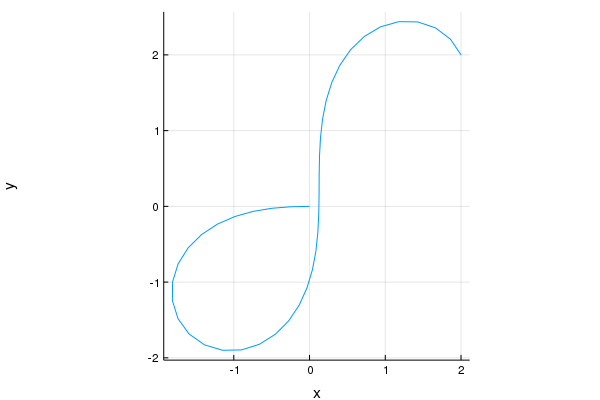

In [164]:
using Plots
gr(fmt=:png)
plot([TOS_SCPS.SS.traj.X[1,:]], [TOS_SCPS.SS.traj.X[2,:]],
    xlabel = "x",
    ylabel = "y",
    aspect_ratio = 1,
    legend = :none)